In [7]:
import pandas as pd
import glob
import os


folder_path = 'C:/Users/94903/OneDrive/桌面/声音数据2'


file_paths = glob.glob(os.path.join(folder_path, '*.xlsx'))


dataframes = {os.path.basename(path): pd.read_excel(path) for path in file_paths}


In [9]:
print(dataframes.keys())

dict_keys(['副本安静的tram发动.xlsx', '十字路口的车辆和有轨电车进站 的副本.xlsx', '地铁站出口 的副本.xlsx', '建筑工地 的副本.xlsx', '摩托车路过 的副本.xlsx', '无事发生人行道 的副本.xlsx', '有轨电车声音源头 的副本.xlsx', '树园、音乐 的副本.xlsx', '汽车不动 的副本.xlsx', '汽车发动 的副本.xlsx', '车流马路 的副本.xlsx', '车流马路2 的副本.xlsx', '零售店门口有人群 的副本.xlsx', '餐馆 的副本.xlsx'])


In [13]:
processed_data = {}

for name, df in dataframes.items():
    n = len(df)
    selected_rows = df.iloc[[0] + list(range(10, n-1, 10)) + [n-1]].dropna(subset=["Sound pressure level (dB)"])
    processed_data[name] = selected_rows.reset_index(drop=True)


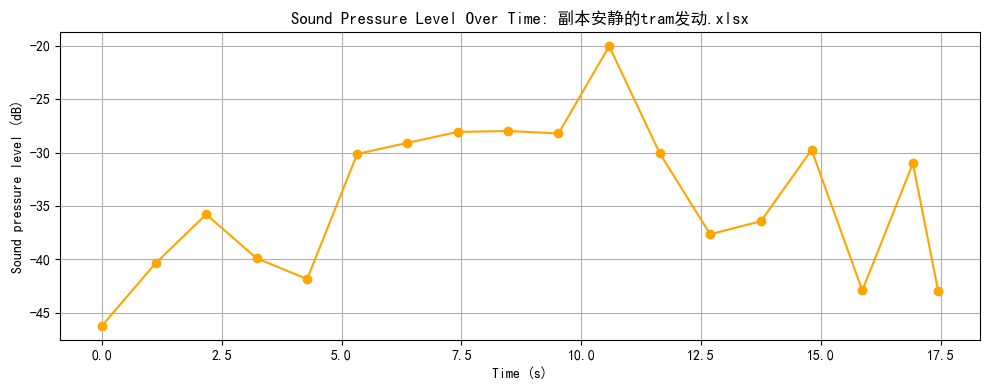

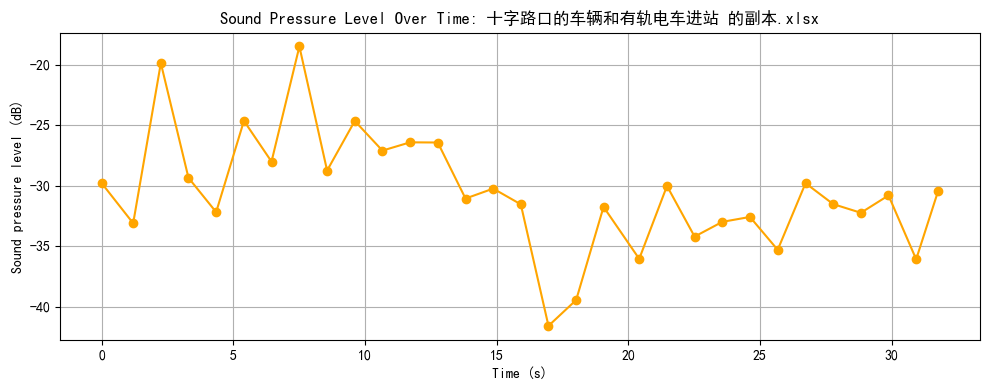

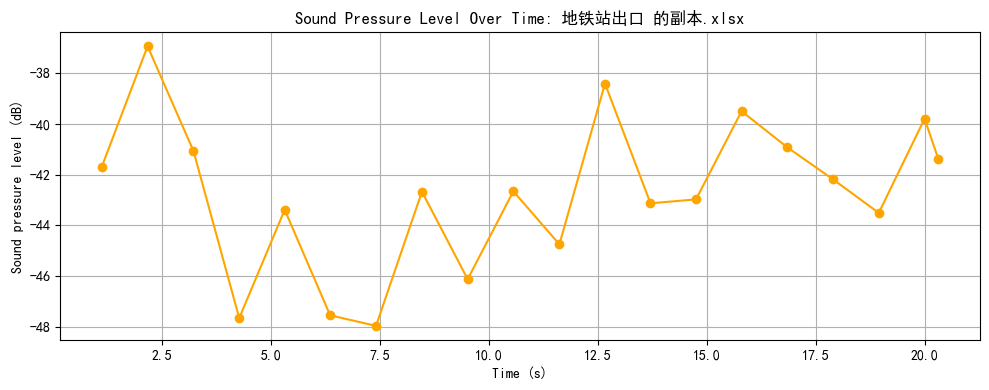

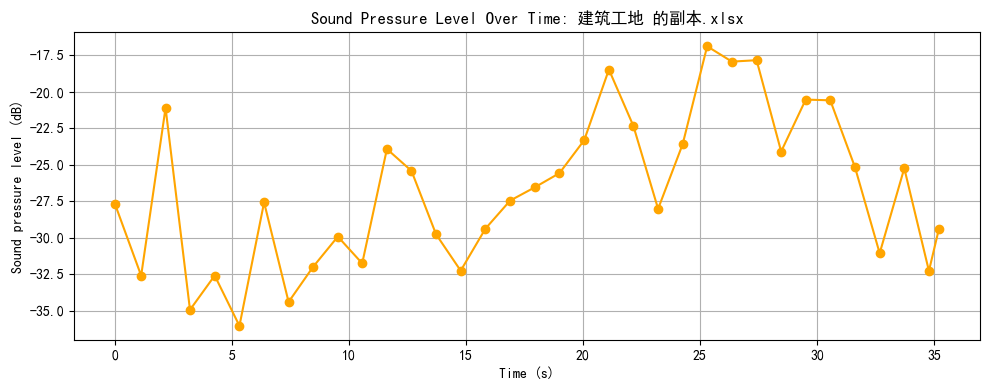

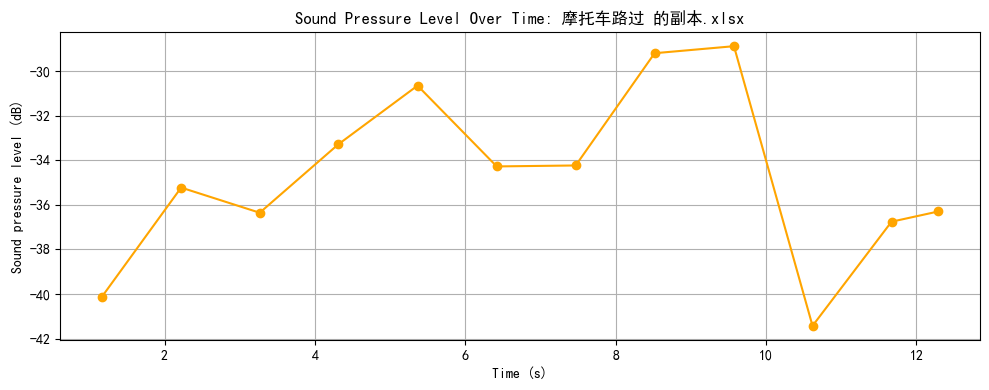

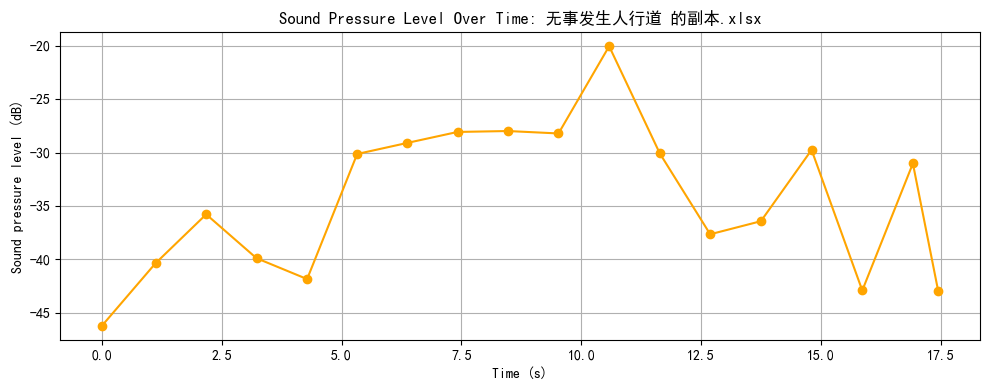

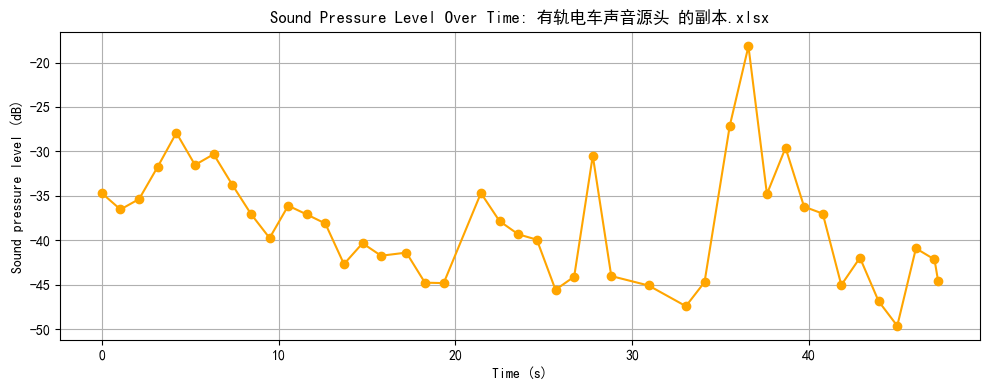

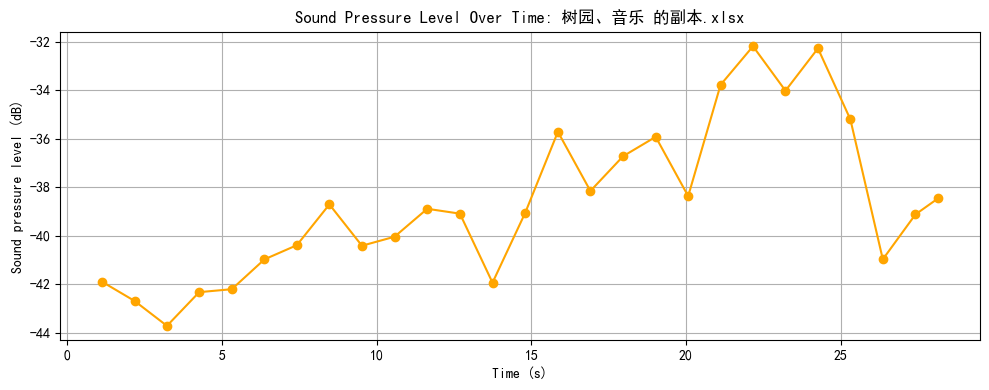

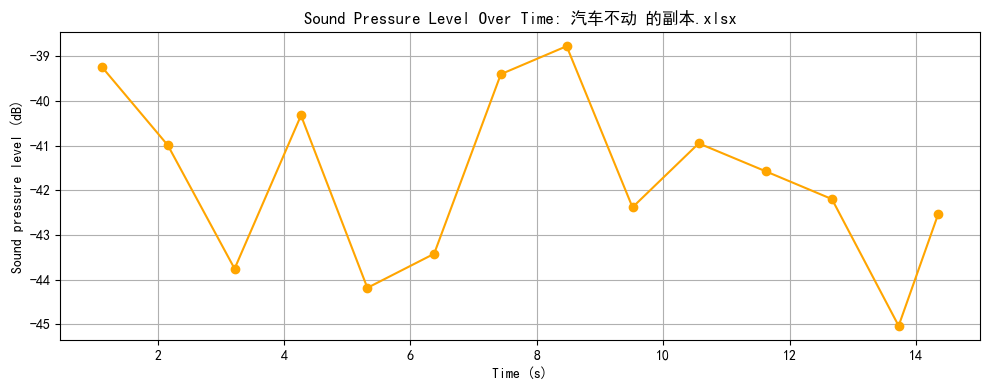

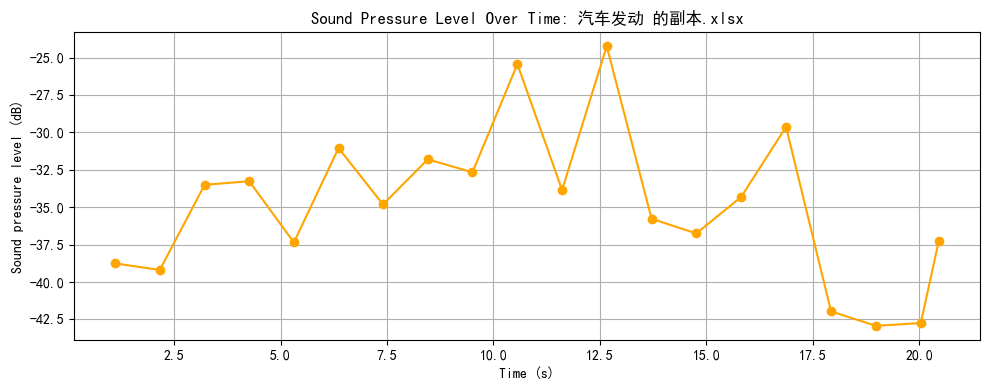

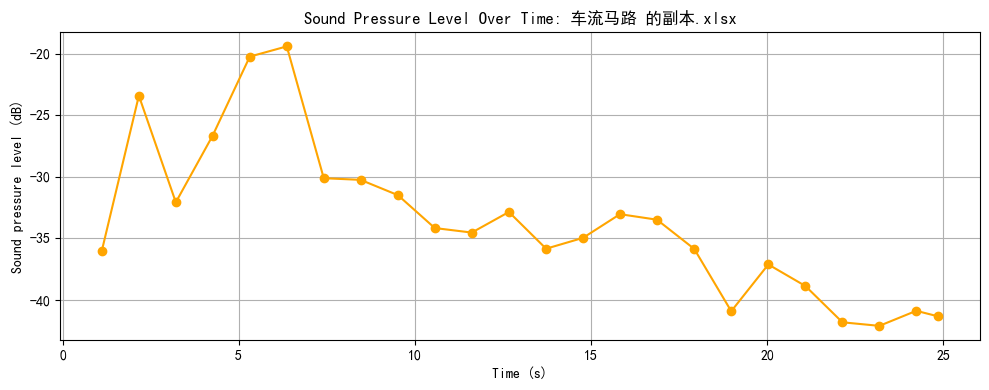

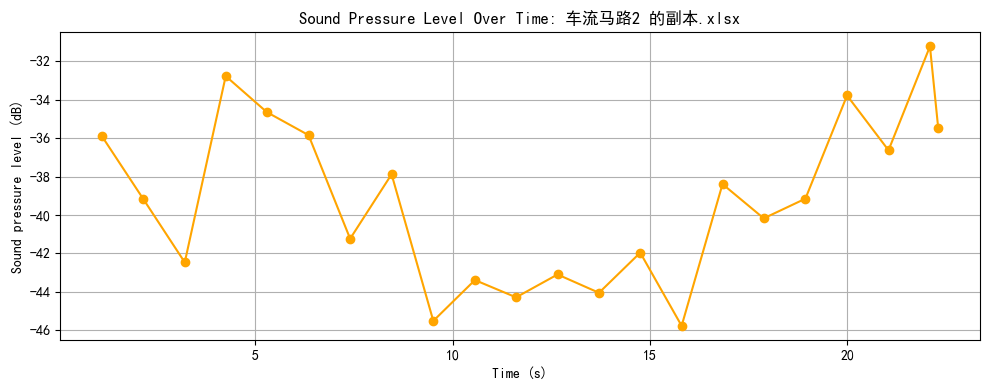

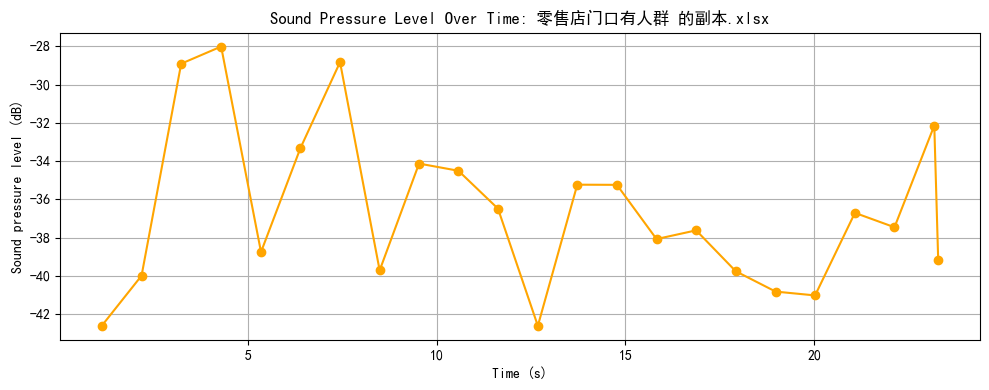

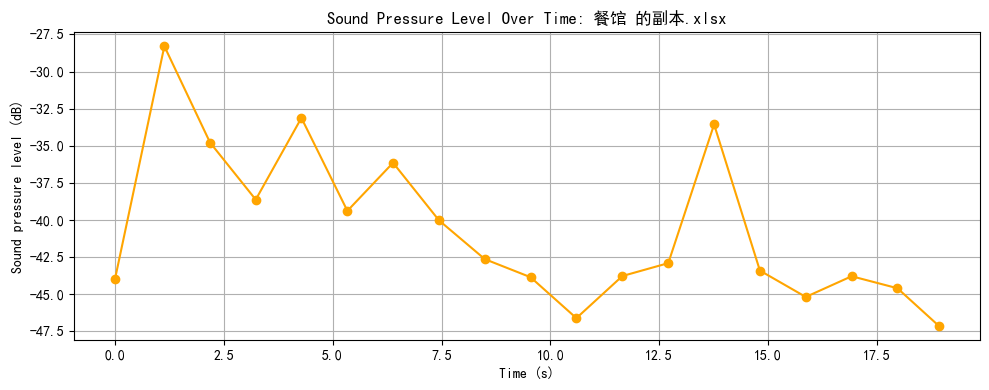

In [23]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  
matplotlib.rcParams['axes.unicode_minus'] = False    

for name, df in processed_data.items():
    plt.figure(figsize=(10, 4))
    plt.plot(df["Time (s)"], df["Sound pressure level (dB)"], marker='o', color='orange')
    plt.title(f"Sound Pressure Level Over Time: {name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Sound pressure level (dB)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [19]:
output_folder = os.path.join(folder_path, "processed")
os.makedirs(output_folder, exist_ok=True)

for name, df in processed_data.items():
    output_path = os.path.join(output_folder, name.replace('.xlsx', '_processed.csv'))
    df.to_csv(output_path, index=False)

In [29]:
sampled_dataframes = {}

for name, df in dataframes.items():
    df_clean = df.dropna(subset=["Sound pressure level (dB)"]).reset_index(drop=True)
    n = len(df_clean)
    selected_indices = [0] + list(range(10, n - 1, 10)) + [n - 1] if n > 1 else [0]
    sampled_df = df_clean.iloc[selected_indices].reset_index(drop=True)
    sampled_dataframes[name] = sampled_df

In [31]:
offset_db = 90
calibrated_dataframes = {}
for name, df in sampled_dataframes.items():
    df_corrected = df.copy()
    df_corrected["Calibrated dB"] = df_corrected["Sound pressure level (dB)"] + offset_db
    calibrated_dataframes[name] = df_corrected

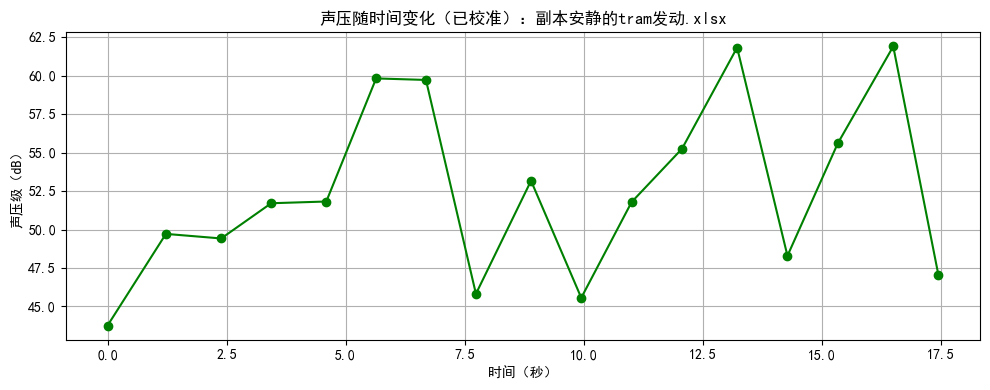

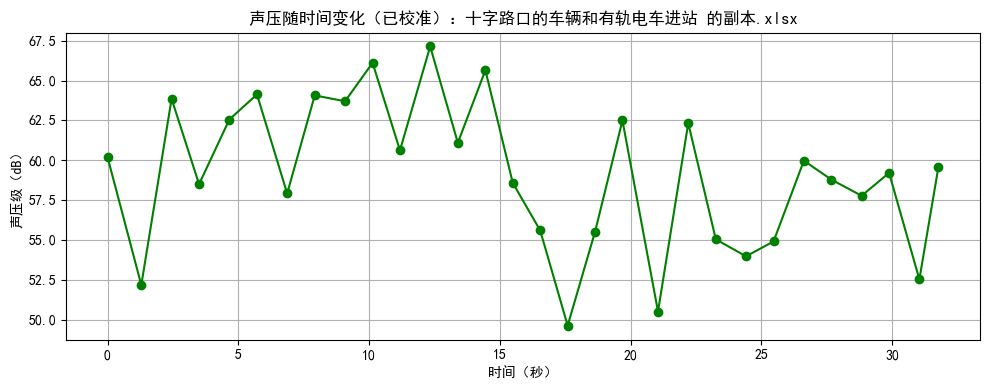

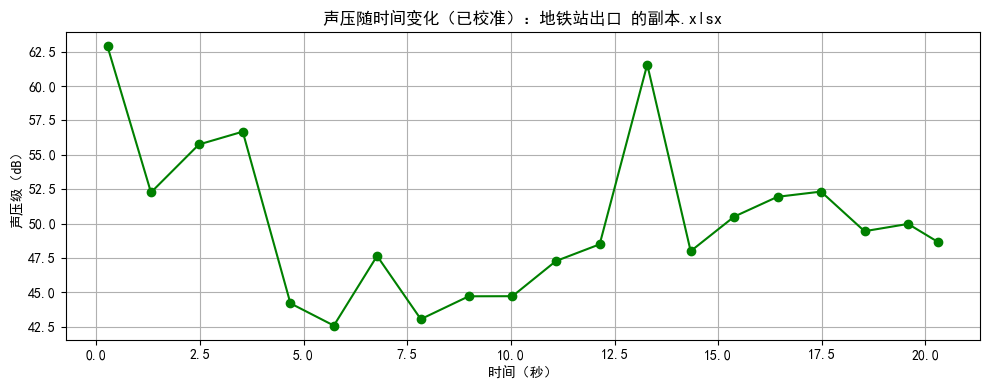

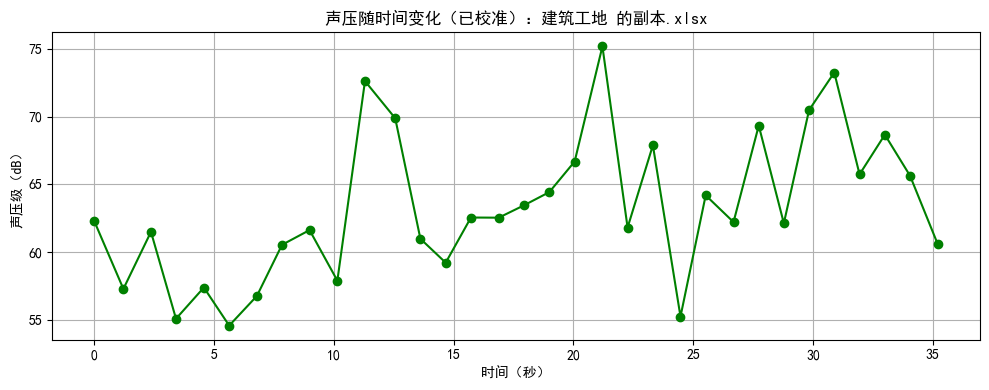

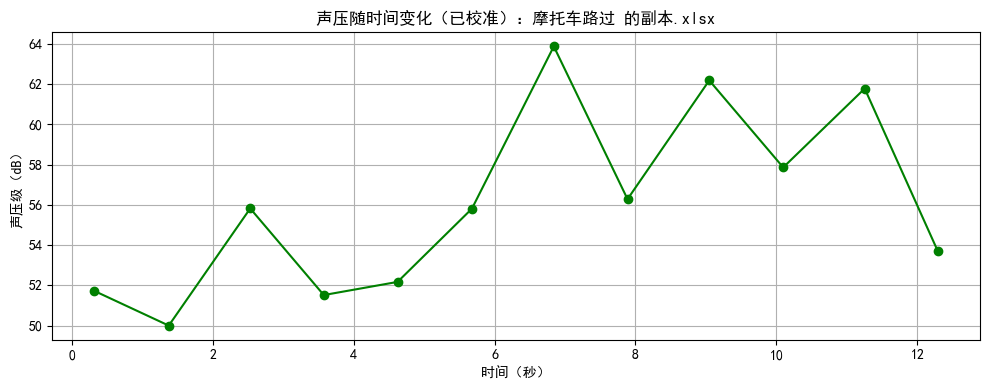

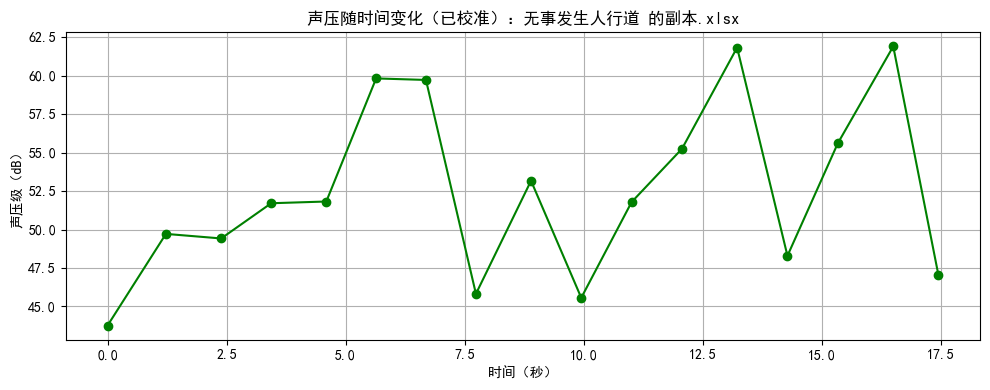

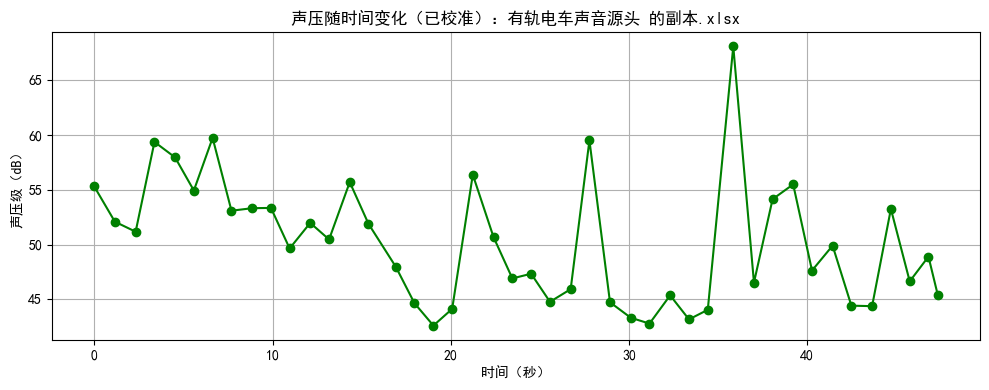

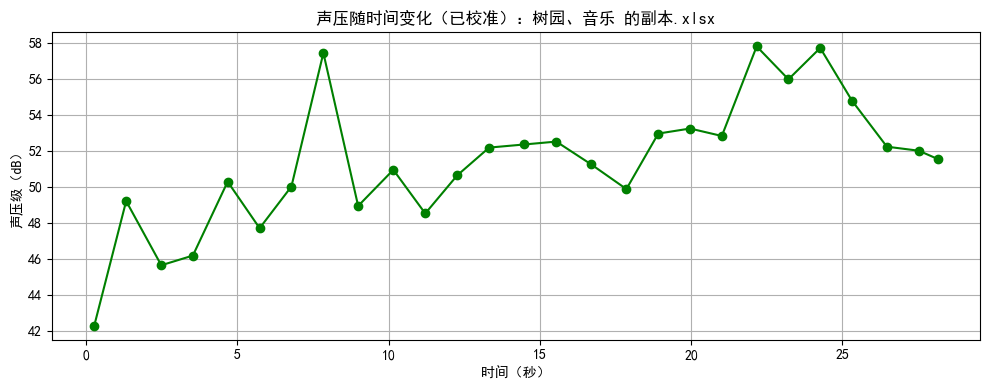

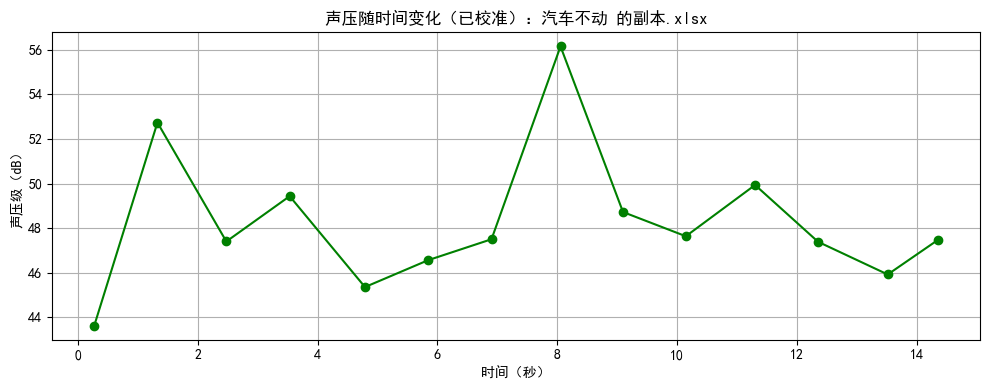

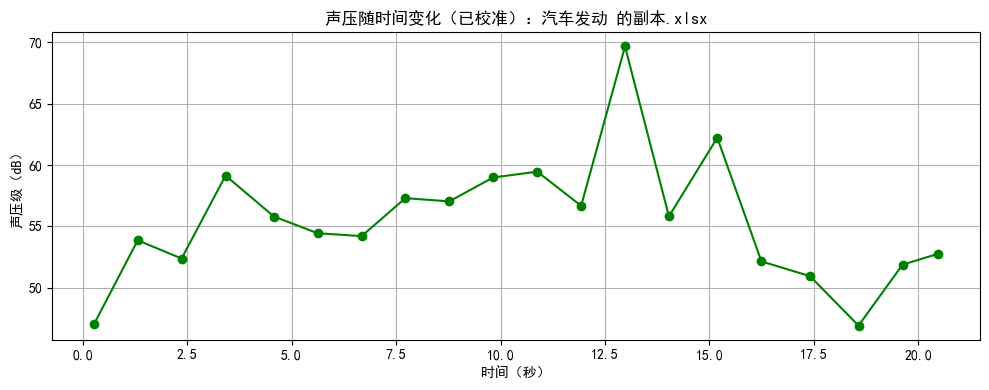

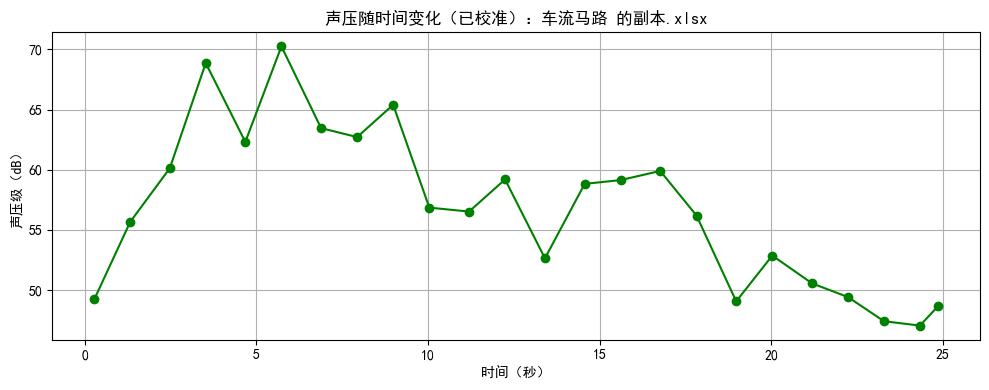

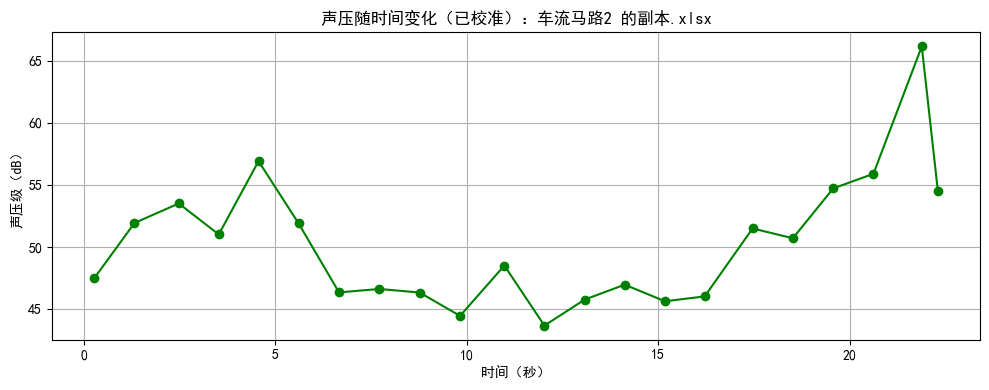

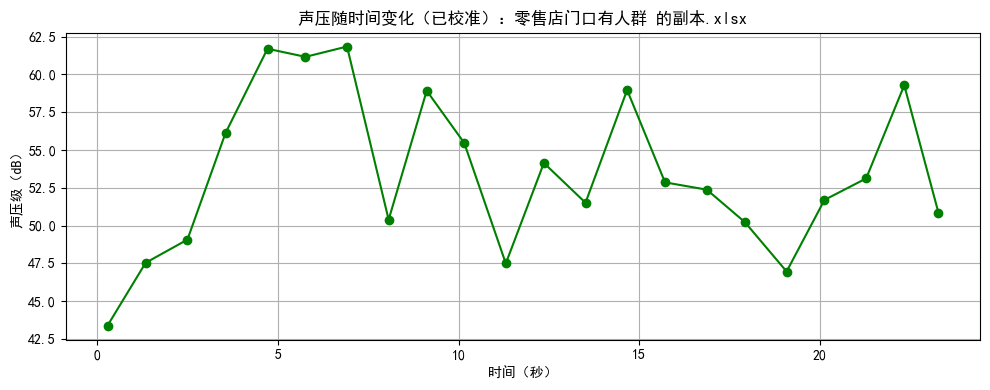

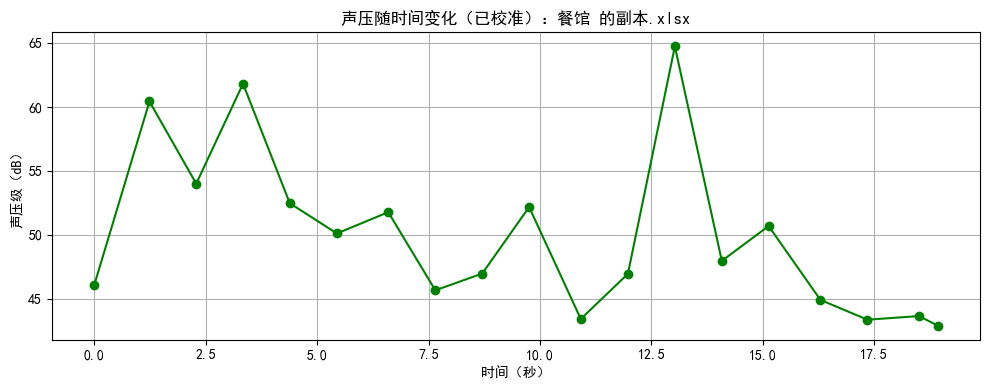

In [34]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.sans-serif'] = ['SimHei']  
matplotlib.rcParams['axes.unicode_minus'] = False    

for name, df in calibrated_dataframes.items():
    plt.figure(figsize=(10, 4))
    plt.plot(df["Time (s)"], df["Calibrated dB"], marker='o', color='green')
    plt.title(f"声压随时间变化（已校准）：{name}")
    plt.xlabel("时间（秒）")
    plt.ylabel("声压级（dB）")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [38]:
import pandas as pd

summary_stats = []
for name, df in calibrated_dataframes.items():
    mean_db = df["Calibrated dB"].mean()
    max_db = df["Calibrated dB"].max()
    min_db = df["Calibrated dB"].min()
    summary_stats.append({
        "Location": name.replace(" 的副本.xlsx", "").replace(".xlsx", ""),
        "Mean dB": round(mean_db, 2),
        "Max dB": round(max_db, 2),
        "Min dB": round(min_db, 2)
    })
    
summary_df = pd.DataFrame(summary_stats).sort_values("Mean dB", ascending=False).reset_index(drop=True)

print(summary_df)

          Location  Mean dB  Max dB  Min dB
0             建筑工地    63.33   75.18   54.59
1   十字路口的车辆和有轨电车进站    59.14   67.15   49.62
2             车流马路    56.78   70.26   47.07
3            摩托车路过    56.06   63.86   50.00
4             汽车发动    55.43   69.68   46.90
5         零售店门口有人群    53.41   61.85   43.38
6      副本安静的tram发动    52.48   61.90   43.75
7          无事发生人行道    52.48   61.90   43.75
8            树园、音乐    51.38   57.82   42.28
9            车流马路2    50.30   66.13   43.68
10        有轨电车声音源头    50.20   68.11   42.59
11           地铁站出口    50.13   62.88   42.57
12              餐馆    50.00   64.77   42.88
13            汽车不动    48.27   56.15   43.63


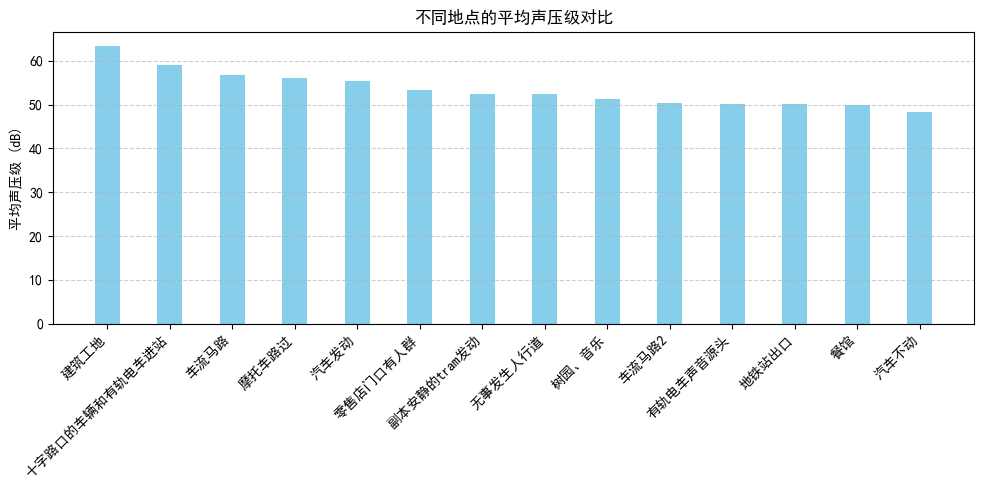

In [42]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 5))
bars = plt.bar(summary_df["Location"], summary_df["Mean dB"], color='skyblue', width=0.4)  # width 控制柱体宽度
plt.xticks(rotation=45, ha='right')
plt.ylabel("平均声压级 (dB)")
plt.title("不同地点的平均声压级对比")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

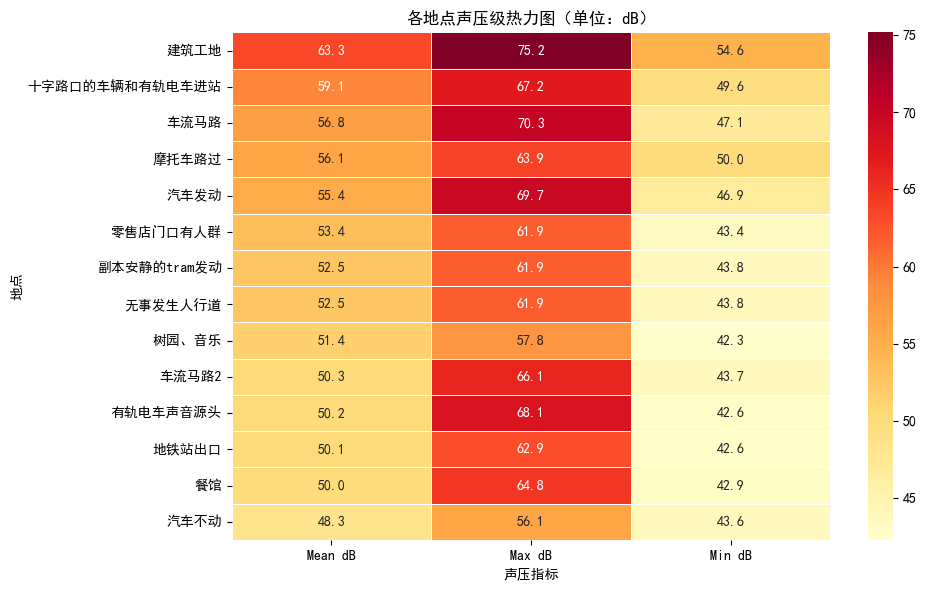

In [44]:
import seaborn as sns

# 准备数据用于热力图
heatmap_data = summary_df.set_index("Location")[["Mean dB", "Max dB", "Min dB"]]

# 绘制热力图
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlOrRd", fmt=".1f", linewidths=0.5)
plt.title("各地点声压级热力图（单位：dB）")
plt.ylabel("地点")
plt.xlabel("声压指标")
plt.tight_layout()
plt.show()


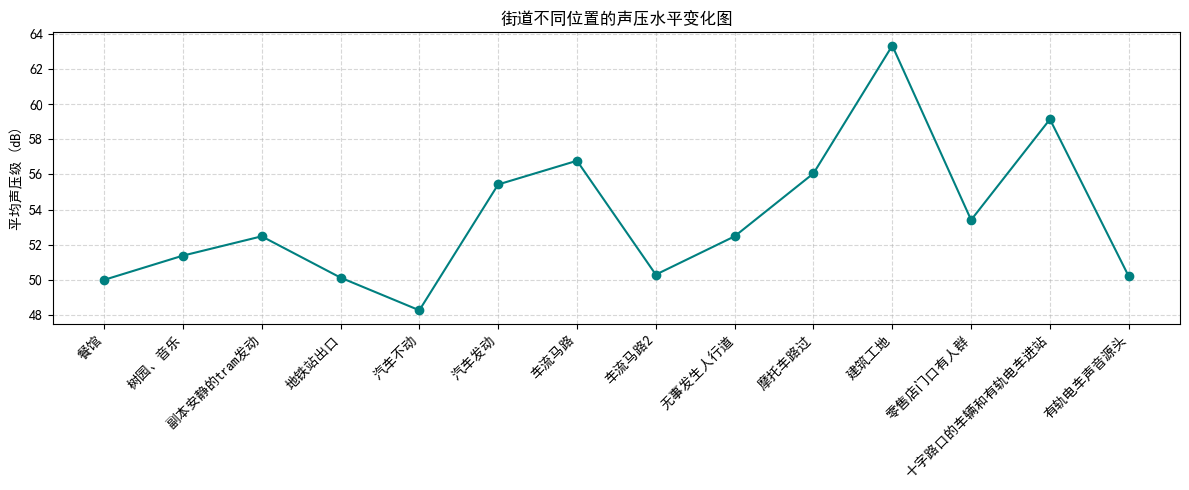

In [46]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['axes.unicode_minus'] = False

location_order = [
    "餐馆",
    "树园、音乐",
    "副本安静的tram发动",
    "地铁站出口",
    "汽车不动",
    "汽车发动",
    "车流马路",
    "车流马路2",
    "无事发生人行道",
    "摩托车路过",
    "建筑工地",
    "零售店门口有人群",
    "十字路口的车辆和有轨电车进站",
    "有轨电车声音源头"
]

ordered_df = summary_df.set_index("Location").loc[location_order].reset_index()

plt.figure(figsize=(12, 5))
plt.plot(ordered_df["Location"], ordered_df["Mean dB"], marker='o', linestyle='-', color='teal')
plt.xticks(rotation=45, ha='right')
plt.ylabel("平均声压级 (dB)")
plt.title("街道不同位置的声压水平变化图")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

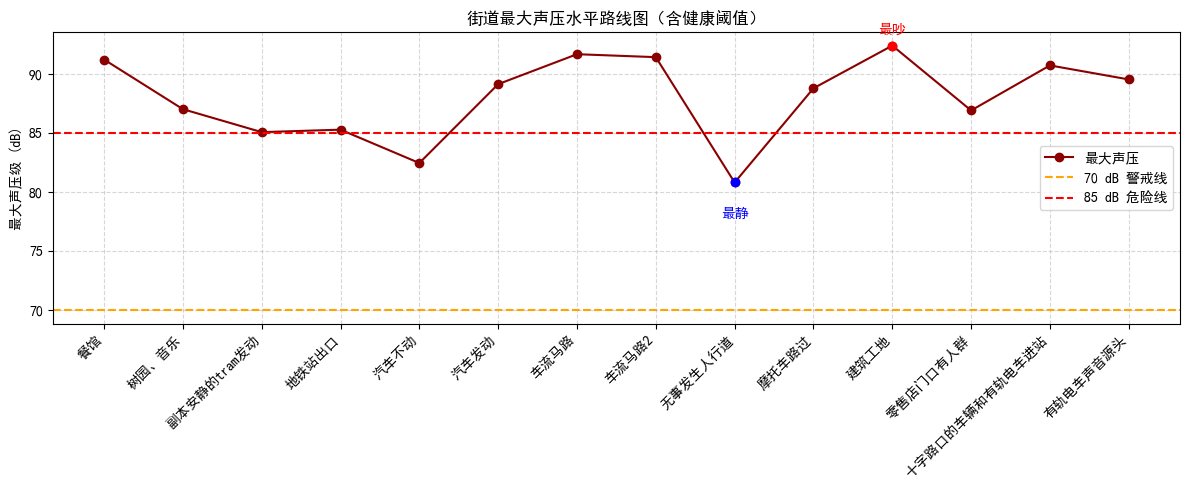

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 设置中文支持（若本地无 SimHei 可改用 'Microsoft YaHei'）
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 手动定义声压数据（可替换为你的实际 summary_df）
summary_data = [
    {"Location": "餐馆", "Mean dB": 81.43, "Max dB": 91.27},
    {"Location": "树园、音乐", "Mean dB": 78.54, "Max dB": 87.06},
    {"Location": "副本安静的tram发动", "Mean dB": 76.31, "Max dB": 85.11},
    {"Location": "地铁站出口", "Mean dB": 75.86, "Max dB": 85.32},
    {"Location": "汽车不动", "Mean dB": 74.69, "Max dB": 82.49},
    {"Location": "汽车发动", "Mean dB": 78.42, "Max dB": 89.18},
    {"Location": "车流马路", "Mean dB": 82.65, "Max dB": 91.72},
    {"Location": "车流马路2", "Mean dB": 83.14, "Max dB": 91.47},
    {"Location": "无事发生人行道", "Mean dB": 72.53, "Max dB": 80.84},
    {"Location": "摩托车路过", "Mean dB": 79.56, "Max dB": 88.83},
    {"Location": "建筑工地", "Mean dB": 85.73, "Max dB": 92.45},
    {"Location": "零售店门口有人群", "Mean dB": 77.25, "Max dB": 86.95},
    {"Location": "十字路口的车辆和有轨电车进站", "Mean dB": 80.91, "Max dB": 90.77},
    {"Location": "有轨电车声音源头", "Mean dB": 79.73, "Max dB": 89.58}
]
summary_df = pd.DataFrame(summary_data)

# 指定顺序
location_order = [
    "餐馆", "树园、音乐", "副本安静的tram发动", "地铁站出口", "汽车不动", "汽车发动",
    "车流马路", "车流马路2", "无事发生人行道", "摩托车路过", "建筑工地",
    "零售店门口有人群", "十字路口的车辆和有轨电车进站", "有轨电车声音源头"
]
ordered_df = summary_df.set_index("Location").loc[location_order].reset_index()

# 绘图
plt.figure(figsize=(12, 5))
plt.plot(ordered_df["Location"], ordered_df["Max dB"], marker='o', linestyle='-', color='darkred', label="最大声压")

# 添加警戒线
plt.axhline(70, color='orange', linestyle='--', label='70 dB 警戒线')
plt.axhline(85, color='red', linestyle='--', label='85 dB 危险线')

# 最吵 & 最静 标注
max_idx = ordered_df["Max dB"].idxmax()
min_idx = ordered_df["Max dB"].idxmin()
plt.scatter(ordered_df.loc[max_idx, "Location"], ordered_df.loc[max_idx, "Max dB"], color='red', zorder=5)
plt.scatter(ordered_df.loc[min_idx, "Location"], ordered_df.loc[min_idx, "Max dB"], color='blue', zorder=5)
plt.text(ordered_df.loc[max_idx, "Location"], ordered_df.loc[max_idx, "Max dB"] + 1, "最吵", ha='center', color='red')
plt.text(ordered_df.loc[min_idx, "Location"], ordered_df.loc[min_idx, "Max dB"] - 3, "最静", ha='center', color='blue')

# 细节美化
plt.xticks(rotation=45, ha='right')
plt.ylabel("最大声压级 (dB)")
plt.title("街道最大声压水平路线图（含健康阈值）")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [5]:
print(summary_df.columns)

RangeIndex(start=0, stop=0, step=1)


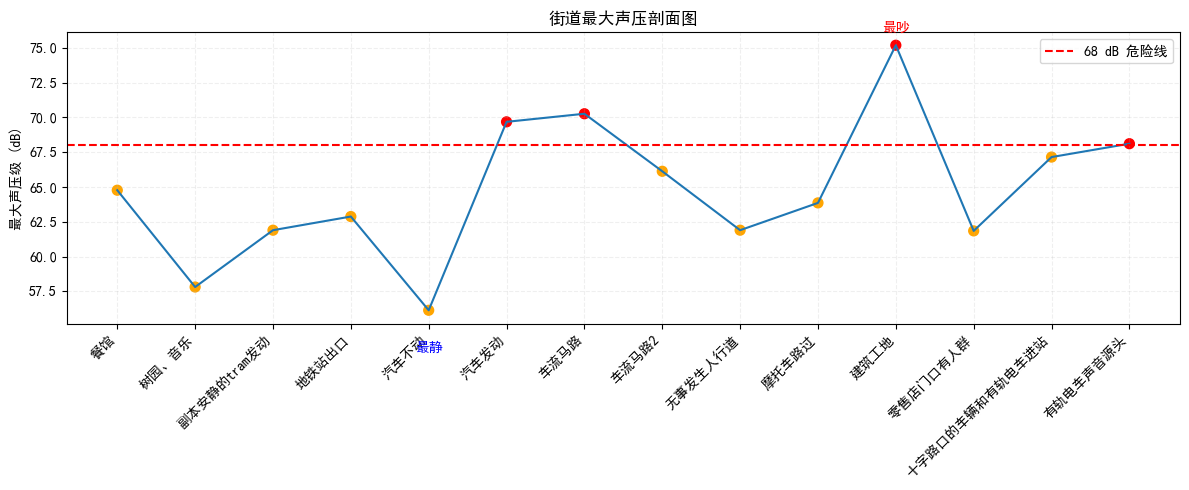

In [21]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

folder_path = "C:/Users/94903/OneDrive/桌面/声音数据2"  
file_paths = glob.glob(os.path.join(folder_path, "*.xlsx"))
dataframes = {os.path.basename(path): pd.read_excel(path) for path in file_paths}

offset_db = 90
summary_stats = {}

for name, df in dataframes.items():
    df_clean = df.dropna(subset=["Sound pressure level (dB)"]).reset_index(drop=True)
    n = len(df_clean)
    selected_indices = [0] + list(range(10, n - 1, 10)) + [n - 1] if n > 1 else [0]
    sampled_df = df_clean.iloc[selected_indices].reset_index(drop=True)
    sampled_df["Calibrated dB"] = sampled_df["Sound pressure level (dB)"] + offset_db

    location = name.replace(" 的副本.xlsx", "").replace(".xlsx", "")
    summary_stats[location] = {
        "Location": location,
        "Mean dB": round(sampled_df["Calibrated dB"].mean(), 2),
        "Max dB": round(sampled_df["Calibrated dB"].max(), 2)
    }

summary_df = pd.DataFrame(list(summary_stats.values()))

location_order = [
    "餐馆", "树园、音乐", "副本安静的tram发动", "地铁站出口", "汽车不动", "汽车发动",
    "车流马路", "车流马路2", "无事发生人行道", "摩托车路过", "建筑工地",
    "零售店门口有人群", "十字路口的车辆和有轨电车进站", "有轨电车声音源头"
]
valid_order = [loc for loc in location_order if loc in summary_df["Location"].tolist()]
ordered_df = summary_df.set_index("Location").loc[valid_order].reset_index()

def classify_noise(db):
    if db < 55:
        return "低噪声区"
    elif db < 68:
        return "中等噪声"
    else:
        return "高风险噪声"

ordered_df["Noise Category"] = ordered_df["Max dB"].apply(classify_noise)

color_map = {"低噪声区": "green", "中等噪声": "orange", "高风险噪声": "red"}
colors = ordered_df["Noise Category"].map(color_map)

plt.figure(figsize=(12, 5))
plt.scatter(ordered_df.index, ordered_df["Max dB"], color=colors, s=50) # 点的大小
plt.plot(ordered_df.index, ordered_df["Max dB"])


plt.axhline(68, color='red', linestyle='--', label='68 dB 危险线')

max_idx = ordered_df["Max dB"].idxmax()
min_idx = ordered_df["Max dB"].idxmin()
plt.text(max_idx, ordered_df.loc[max_idx, "Max dB"] + 1, "最吵", ha='center', color='red')
plt.text(min_idx, ordered_df.loc[min_idx, "Max dB"] - 3, "最静", ha='center', color='blue')


plt.xticks(ticks=ordered_df.index, labels=ordered_df["Location"], rotation=45, ha='right')

plt.ylabel("最大声压级 (dB)")
plt.title("街道最大声压剖面图")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()
